In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
# see https://gist.github.com/tungwaiyip/8987366

0.06883338952930085


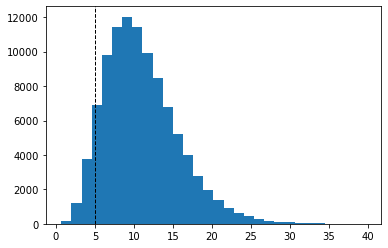

In [125]:
# we know that the sums of squares of variables from the standard normal 
# distribution are chi-squared distributed, so lets do some inference on
# the lengths of our samples

# 1. sample N samples from a standard normal with d dimensions:
N = 100000
d = 11
X = np.random.randn(N, d)

# 2. compute the 'lengths' (these are chi-square distributed) and the average length
lengths = ((X**2).sum(1))
av_length = lengths.mean()

# 3. specify an example datapoint to do inference with
x = lengths[0]
x = 5

# 4. compute the cdf and p-value under the null
dist = chi2(d)
tru_mean = dist.mean()

# pick the right or left tail depending on magnitude
# this is because we might be interested in classifying either very 'long lengths'
# as outliers (which lie far from the mean), as well as very 'short lengths', which
# lie close to the mean
if x >= tru_mean: 
    p =  1 - chi2.cdf(x=x, df=d)
else:
    p =  chi2.cdf(x=x, df=d)
    
plt.hist(lengths, bins=30)
plt.axvline(x, color='k', linestyle='dashed', linewidth=1)
print(p)